# First Pass EDA and hero selection significance model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

/home/paul/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Stuff I'll actually use

In [3]:
hero_names = pd.read_csv("hero_names.csv")

In [2]:
players = pd.read_csv("players.csv")

In [4]:
df = players.groupby(['match_id'])

In [32]:
players.query('hero_id == 0').shape

(37, 73)

In [26]:
players.query('match_id == 2134')

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
21340,2134,0,5,0,1174,2455,393,259,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21341,2134,10782,42,1,0,3775,461,445,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21342,2134,0,21,2,0,3275,431,321,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21343,2134,9442,0,3,0,0,100,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21344,2134,9441,0,4,0,0,100,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21345,2134,0,16,128,1332,870,196,134,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21346,2134,0,11,129,697,3845,503,485,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21347,2134,10783,12,130,1345,2085,348,375,2,0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
21348,2134,10784,65,131,1009,1550,280,421,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21349,2134,0,79,132,246,1405,147,183,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
players.query('match_id == 37020')

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
370200,37020,127953,0,0,0,0,241,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370201,37020,0,61,1,7673,10590,719,707,6,5,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370202,37020,0,8,2,3041,13705,602,599,6,2,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
370203,37020,0,104,3,352,15080,570,474,4,5,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
370204,37020,44940,11,4,1483,14685,592,479,3,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370205,37020,0,14,128,278,9525,407,483,8,7,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370206,37020,0,36,129,596,10260,419,452,2,6,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
370207,37020,0,56,130,3792,7755,444,505,6,4,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
370208,37020,127954,0,131,0,0,106,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370209,37020,0,74,132,1528,9740,409,506,1,3,...,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
players.groupby('match_id')['hero_id'].value_counts().value_counts()

1    499996
2         2
Name: hero_id, dtype: int64

In [226]:
players.query('s < 10')

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue,s
2134,213,1255,105,4,694,15425,356,392,6,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
37020,3702,16638,64,0,1824,8740,314,341,7,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [46]:
match_makeup.iloc[2134,:]['all_heroes'][2]

21

In [16]:
match_makeup['num_heroes'] = len(match_makeup['all_heroes'][0])

In [ ]:
def gen_heroes

In [51]:
match_makeup.head()

,match_id,all_heroes,team_1,team_2,num_heroes
0,0,"[86, 51, 83, 11, 67, 106, 102, 46, 7, 73]","[86, 51, 83, 11, 67]","[106, 102, 46, 7, 73]",10
1,1,"[7, 82, 71, 39, 21, 73, 22, 5, 67, 106]","[7, 82, 71, 39, 21]","[73, 22, 5, 67, 106]",10
2,2,"[51, 109, 9, 41, 27, 38, 7, 10, 12, 85]","[51, 109, 9, 41, 27]","[38, 7, 10, 12, 85]",10
3,3,"[50, 44, 32, 26, 39, 78, 19, 31, 40, 47]","[50, 44, 32, 26, 39]","[78, 19, 31, 40, 47]",10
4,4,"[8, 39, 55, 87, 69, 101, 100, 22, 67, 21]","[8, 39, 55, 87, 69]","[101, 100, 22, 67, 21]",10


In [26]:
match_makeup[0].values

array([ 86,  51,  83,  11,  67, 106, 102,  46,   7,  73])

In [ ]:
match_makeup['team_1'] = match_makeup[0]

In [4]:
for x in players['match_id'].unique():
    players.groupby('match_id')

array([    0,     1,     2, ..., 49997, 49998, 49999])

In [166]:
test_dict = {}
for x in players:
#     print(players.match_id)
    if test_dict[players.match_id] != None:
        test_dict[players.match_id].append('hero_id')
    else:
        test_dict[players.match_id] = ['hero_id']
test_dict[player.match_id] = []

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [ ]:
players.groupby('match_id')['hero_id'].

In [195]:
players.groupby('match_id')['hero_id'].value_counts()

match_id  hero_id
0         7          1
          11         1
          46         1
          51         1
          67         1
          73         1
          83         1
          86         1
          102        1
          106        1
1         5          1
          7          1
          21         1
          22         1
          39         1
          67         1
          71         1
          73         1
          82         1
          106        1
2         7          1
          9          1
          10         1
          12         1
          27         1
          38         1
          41         1
          51         1
          85         1
          109        1
                    ..
49997     9          1
          21         1
          23         1
          28         1
          39         1
          44         1
          68         1
          75         1
          100        1
          102        1
49998     2          1
          3     

In [136]:
match.head(5)

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156


In [135]:
players.columns

Index(['match_id', 'account_id', 'hero_id', 'player_slot', 'gold',
       'gold_spent', 'gold_per_min', 'xp_per_min', 'kills', 'deaths',
       'assists', 'denies', 'last_hits', 'stuns', 'hero_damage',
       'hero_healing', 'tower_damage', 'item_0', 'item_1', 'item_2', 'item_3',
       'item_4', 'item_5', 'level', 'leaver_status', 'xp_hero', 'xp_creep',
       'xp_roshan', 'xp_other', 'gold_other', 'gold_death', 'gold_buyback',
       'gold_abandon', 'gold_sell', 'gold_destroying_structure',
       'gold_killing_heros', 'gold_killing_creeps', 'gold_killing_roshan',
       'gold_killing_couriers', 'unit_order_none',
       'unit_order_move_to_position', 'unit_order_move_to_target',
       'unit_order_attack_move', 'unit_order_attack_target',
       'unit_order_cast_position', 'unit_order_cast_target',
       'unit_order_cast_target_tree', 'unit_order_cast_no_target',
       'unit_order_cast_toggle', 'unit_order_hold_position',
       'unit_order_train_ability', 'unit_order_drop_item',


In [99]:
hero_names.head()

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden


In [129]:
hero_names.query('hero_id == 108')

,name,hero_id,localized_name
106,npc_dota_hero_abyssal_underlord,108,Underlord


In [131]:
test = players.merge(match, how='left', on='match_id', suffixes=('_x','_y'))

In [134]:
test.groupby('match_id').head()

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,0,86,0,3261,10960,347,362,9,3,...,1982,4,3,63,1,22,True,0,1,155
1,0,1,51,1,2954,17760,494,659,13,3,...,1982,4,3,63,1,22,True,0,1,155
2,0,0,83,2,110,12195,350,385,0,4,...,1982,4,3,63,1,22,True,0,1,155
3,0,2,11,3,1179,22505,599,605,8,4,...,1982,4,3,63,1,22,True,0,1,155
4,0,3,67,4,3307,23825,613,762,20,3,...,1982,4,3,63,1,22,True,0,1,155
10,1,0,7,0,76,12160,218,206,3,4,...,0,1846,63,0,221,22,False,0,2,154
11,1,7,82,1,9,19625,581,756,9,10,...,0,1846,63,0,221,22,False,0,2,154
12,1,0,71,2,1240,10220,339,352,5,13,...,0,1846,63,0,221,22,False,0,2,154
13,1,8,39,3,2400,14395,460,544,12,15,...,0,1846,63,0,221,22,False,0,2,154
14,1,4,21,4,1051,12910,365,436,6,11,...,0,1846,63,0,221,22,False,0,2,154


## Hero Dummies

In [54]:
match_makeup.head()

,match_id,all_heroes,team_1,team_2,num_heroes
0,0,"[86, 51, 83, 11, 67, 106, 102, 46, 7, 73]","[86, 51, 83, 11, 67]","[106, 102, 46, 7, 73]",10
1,1,"[7, 82, 71, 39, 21, 73, 22, 5, 67, 106]","[7, 82, 71, 39, 21]","[73, 22, 5, 67, 106]",10
2,2,"[51, 109, 9, 41, 27, 38, 7, 10, 12, 85]","[51, 109, 9, 41, 27]","[38, 7, 10, 12, 85]",10
3,3,"[50, 44, 32, 26, 39, 78, 19, 31, 40, 47]","[50, 44, 32, 26, 39]","[78, 19, 31, 40, 47]",10
4,4,"[8, 39, 55, 87, 69, 101, 100, 22, 67, 21]","[8, 39, 55, 87, 69]","[101, 100, 22, 67, 21]",10


In [52]:
hero_names.hero_id.nunique()

112

In [179]:
match_makeup.query('team_2_hero_86 == 1')[['match_id','team_2']]

,match_id,team_2
53,53,"[99, 68, 42, 39, 86]"
73,73,"[86, 27, 42, 15, 73]"
88,88,"[86, 70, 110, 71, 106]"
92,92,"[8, 38, 97, 85, 86]"
97,97,"[86, 21, 1, 8, 15]"
106,106,"[86, 17, 26, 87, 54]"
121,121,"[86, 42, 51, 112, 46]"
152,152,"[100, 69, 86, 47, 18]"
153,153,"[86, 64, 12, 39, 73]"
161,161,"[9, 86, 93, 30, 44]"


In [169]:
match_makeup.iloc[:,4:116].apply(lambda x: x.sum(), axis = 0)

team_1_hero_1       4637
team_1_hero_2       2291
team_1_hero_3       1280
team_1_hero_4       1499
team_1_hero_5       3965
team_1_hero_6       1313
team_1_hero_7       5838
team_1_hero_8       5137
team_1_hero_9       3639
team_1_hero_10       750
team_1_hero_11      9008
team_1_hero_12      1853
team_1_hero_13       865
team_1_hero_14      4815
team_1_hero_15       960
team_1_hero_16      1570
team_1_hero_17      1190
team_1_hero_18      1740
team_1_hero_19      2616
team_1_hero_20      2136
team_1_hero_21     10324
team_1_hero_22      2260
team_1_hero_23      1310
team_1_hero_24         0
team_1_hero_25      4062
team_1_hero_26      3699
team_1_hero_27      1784
team_1_hero_28      5445
team_1_hero_29      1196
team_1_hero_30      3651
                   ...  
team_1_hero_83       887
team_1_hero_84      2169
team_1_hero_85      3001
team_1_hero_86      4095
team_1_hero_87      2407
team_1_hero_88      1362
team_1_hero_89       490
team_1_hero_90      1085
team_1_hero_91       820


In [181]:
hero_names.query('localized_name == "Centaur Warrunner"')['hero_id']

94    96
Name: hero_id, dtype: int64

In [182]:
hero_names.query('hero_id == 96')

,name,hero_id,localized_name
94,npc_dota_hero_centaur,96,Centaur Warrunner


## Testing 1 2 1 2

In [33]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [3]:
players = pd.read_csv('players.csv')
hero_names = pd.read_csv('hero_names.csv')
match = pd.read_csv('match.csv')

In [133]:
match.head()

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156


In [4]:
def hero_side(x):
    stats = ['str','agi','int']
    for k,v in enumerate(radiant_master):
        if x['localized_name'] in v:
            x['stat'] = stats[k]
            x['side'] = 'Radiant'
    for k,v in enumerate(dire_master):
        if x['localized_name'] in v:
            x['stat'] = stats[k]
            x['side'] = 'Dire'
    return x

In [5]:
radiant_str = ['Alchemist','Beastmaster','Brewmaster', 'Bristleback', 'Centaur Warrunner', 'Clockwerk', 'Dragon Knight', 'Earth Spirit',
                    'Earthshaker', 'Elder Titan', 'Huskar', 'Io', 'Kunkka', 'Legion Commander', 'Omniknight', 'Phoenix', 'Sven', 'Timbersaw',
                    'Tiny', 'Treant Protector', 'Tusk']
radiant_agi = ['Anti-Mage', 'Bounty Hunter', 'Drow Ranger', 'Ember Spirit', 'Gyrocopter', 'Juggernaut', 'Lone Druid', 'Luna',
                   'Mirana', 'Morphling', 'Naga Siren', 'Phantom Lancer', 'Riki', 'Sniper', 'Templar Assassin', 'Troll Warlord',
                   'Ursa', 'Vengeful Spirit']
radiant_int = ['Chen', 'Crystal Maiden', 'Disruptor', 'Enchantress', 'Jakiro', 'Keeper of the Light', 'Lina', 'Nature\'s Prophet',
               'Ogre Magi', 'Oracle', 'Puck', 'Rubick', 'Shadow Shaman', 'Silencer', 'Skywrath Mage', 'Storm Spirit', 'Techies', 'Tinker',
               'Windranger', 'Zeus']
radiant_master = [radiant_str, radiant_agi, radiant_int]

In [6]:
dire_str = ['Abaddon', 'Axe', 'Chaos Knight', 'Doom', 'Lifestealer', 'Lycan', 'Magnus', 'Night Stalker', 'Pudge', 'Sand King', 'Slardar', 
            'Spirit Breaker', 'Tidehunter', 'Underlord', 'Undying', 'Wraith King']
dire_agi = ['Arc Warden', 'Bloodseeker', 'Broodmother', 'Clinkz', 'Faceless Void', 'Medusa', 'Meepo', 'Nyx Assassin', 'Phantom Assassin', 'Razor',
            'Shadow Fiend', 'Slark', 'Spectre', 'Terrorblade', 'Venomancer', 'Viper', 'Weaver']
dire_int = ['Ancient Apparition', 'Bane', 'Batrider', 'Dark Seer', 'Dazzle', 'Death Prophet', 'Enigma', 'Invoker', 'Leshrac', 'Lich',
            'Lion', 'Necrophos', 'Outworld Devourer', 'Pugna', 'Queen of Pain', 'Shadow Demon', 'Visage', 'Warlock', 'Winter Wyvern', 'Witch Doctor']
dire_master = [dire_str, dire_agi, dire_int]

In [7]:
hero_names = hero_names.apply(hero_side, axis = 1)

In [8]:
match_makeup = pd.DataFrame()

match_makeup['match_id'] = players.match_id.unique()

for x in match_makeup.match_id.unique():
    temp = players.groupby('match_id').hero_id

lists = []
for x in temp:
    lists.append(list(x[1].values))

match_makeup['all_heroes'] = lists

In [9]:
radiant_ids = list(hero_names.query('side=="Radiant"')['hero_id'].unique())

dire_ids = list(hero_names.query('side=="Dire"')['hero_id'].unique())

In [10]:
def place_team(x):
    if x['all_heroes'][0] != 0:
        if x['all_heroes'][0] in radiant_ids:
            x['radiant_makeup'] = x['all_heroes'][:5]
            x['dire_makeup'] = x['all_heroes'][5:]
        else:
            x['radiant_makeup'] = x['all_heroes'][5:]
            x['dire_makeup'] = x['all_heroes'][:5]
    else:
        if x['all_heroes'][1] in radiant_ids:
            x['radiant_makeup'] = x['all_heroes'][:5]
            x['dire_makeup'] = x['all_heroes'][5:]
        else:
            x['radiant_makeup'] = x['all_heroes'][5:]
            x['dire_makeup'] = x['all_heroes'][:5]
    return x

In [11]:
match_makeup = match_makeup.apply(place_team, axis=1)

In [12]:
for y in range(1,3):
    for x in range(0,113):
        match_makeup['team_%s_hero_%s' % (y, x)] = 0

In [14]:
def screw_you_zach(x):
    for y in x['radiant_makeup']:
        x['team_1_hero_%s' % y] = 1
    for z in x['dire_makeup']:
        x['team_2_hero_%s' % z] = 1
    return x

In [84]:
match_makeup = match_makeup.apply(screw_you_zach, axis=1)

### First Pass Cleaned

In [2]:
# import pickle

In [16]:
# first_pass_cleaned = match_makeup
# first_pass_cleaned.to_pickle('first_pass.p')

In [68]:
# match_makeup = first_pass_cleaned

In [85]:
match_makeup.shape

(50000, 231)

In [87]:
match_makeup = match_makeup.query('team_1_hero_0 == 0').query('team_2_hero_0 == 0')

In [89]:
match_makeup.shape

(49965, 231)

In [90]:
match_makeup.head()

,match_id,all_heroes,radiant_makeup,dire_makeup,team_1_hero_0,team_1_hero_1,team_1_hero_2,team_1_hero_3,team_1_hero_4,team_1_hero_5,...,team_2_hero_104,team_2_hero_105,team_2_hero_106,team_2_hero_107,team_2_hero_108,team_2_hero_109,team_2_hero_110,team_2_hero_111,team_2_hero_112,radiant_win
0,0,"[86, 51, 83, 11, 67, 106, 102, 46, 7, 73]","[86, 51, 83, 11, 67]","[106, 102, 46, 7, 73]",0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,"[7, 82, 71, 39, 21, 73, 22, 5, 67, 106]","[7, 82, 71, 39, 21]","[73, 22, 5, 67, 106]",0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,"[51, 109, 9, 41, 27, 38, 7, 10, 12, 85]","[51, 109, 9, 41, 27]","[38, 7, 10, 12, 85]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,"[50, 44, 32, 26, 39, 78, 19, 31, 40, 47]","[78, 19, 31, 40, 47]","[50, 44, 32, 26, 39]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,"[8, 39, 55, 87, 69, 101, 100, 22, 67, 21]","[8, 39, 55, 87, 69]","[101, 100, 22, 67, 21]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
result = match[['match_id','radiant_win']]

In [20]:
match_makeup = match_makeup.merge(result, how = 'left', on = 'match_id')

In [21]:
match_makeup['radiant_win'] = match_makeup['radiant_win'].apply(lambda x: 1 if x == True else 0)

In [22]:
match_makeup.head()

,match_id,all_heroes,radiant_makeup,dire_makeup,team_1_hero_0,team_1_hero_1,team_1_hero_2,team_1_hero_3,team_1_hero_4,team_1_hero_5,...,team_2_hero_104,team_2_hero_105,team_2_hero_106,team_2_hero_107,team_2_hero_108,team_2_hero_109,team_2_hero_110,team_2_hero_111,team_2_hero_112,radiant_win
0,0,"[86, 51, 83, 11, 67, 106, 102, 46, 7, 73]","[86, 51, 83, 11, 67]","[106, 102, 46, 7, 73]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,"[7, 82, 71, 39, 21, 73, 22, 5, 67, 106]","[7, 82, 71, 39, 21]","[73, 22, 5, 67, 106]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,"[51, 109, 9, 41, 27, 38, 7, 10, 12, 85]","[51, 109, 9, 41, 27]","[38, 7, 10, 12, 85]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,"[50, 44, 32, 26, 39, 78, 19, 31, 40, 47]","[78, 19, 31, 40, 47]","[50, 44, 32, 26, 39]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,"[8, 39, 55, 87, 69, 101, 100, 22, 67, 21]","[8, 39, 55, 87, 69]","[101, 100, 22, 67, 21]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [91]:
y = match_makeup['radiant_win']

In [92]:
y.shape

(49965,)

In [24]:
y.mean()

0.51886

In [50]:
X.shape

(50000, 226)

In [51]:
X_train.shape

(35000, 226)

In [52]:
X_test.shape

(15000, 226)

In [96]:
X = match_makeup.iloc[:,5:-1]

In [97]:
X.describe()

,team_1_hero_1,team_1_hero_2,team_1_hero_3,team_1_hero_4,team_1_hero_5,team_1_hero_6,team_1_hero_7,team_1_hero_8,team_1_hero_9,team_1_hero_10,...,team_2_hero_103,team_2_hero_104,team_2_hero_105,team_2_hero_106,team_2_hero_107,team_2_hero_108,team_2_hero_109,team_2_hero_110,team_2_hero_111,team_2_hero_112
count,49965.000000,49965.000000,49965.000000,49965.000000,49965.000000,49965.000000,49965.000000,49965.000000,49965.000000,49965.000000,...,49965.000000,49965.000000,49965.000000,49965.000000,49965.000000,49965.0,49965.000000,49965.000000,49965.000000,49965.000000
mean,0.103392,0.041329,0.022716,0.027039,0.085700,0.028280,0.125168,0.115761,0.078995,0.015911,...,0.007665,0.080556,0.010988,0.066527,0.025438,0.0,0.017532,0.028140,0.009347,0.086420
std,0.304474,0.199052,0.148998,0.162198,0.279923,0.165773,0.330912,0.319941,0.269734,0.125133,...,0.087217,0.272155,0.104246,0.249203,0.157452,0.0,0.131245,0.165374,0.096226,0.280987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [83]:
X.describe()

,team_1_hero_0,team_1_hero_1,team_1_hero_2,team_1_hero_3,team_1_hero_4,team_1_hero_5,team_1_hero_6,team_1_hero_7,team_1_hero_8,team_1_hero_9,...,team_2_hero_103,team_2_hero_104,team_2_hero_105,team_2_hero_106,team_2_hero_107,team_2_hero_108,team_2_hero_109,team_2_hero_110,team_2_hero_111,team_2_hero_112
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
xscaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(xscaled,y,test_size=0.3, random_state=4444)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_acc = rfc.score(X_test,y_test)
print('Accuracy=' +str(round(rfc_acc,4)))

Accuracy=0.5009


In [99]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_acc = lr.score(X_test,y_test)
print('Accuracy=' +str(round(lr_acc,4)))

Accuracy=0.5163


In [62]:
s = rfc.predict(X_test)

In [63]:
set(s)

{1}

In [70]:
test = pd.DataFrame(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
y_train.mean()

0.5195428571428572

In [ ]:
num_neighbors = [x for x in range(1,21)]

accuracy = {}
for n in num_neighbors:
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy[3] = accuracy_score(y_test, y_pred)
for k,v in accuracy.items():
    print("For k=%s" % k + " the accuracy was " + str("%.2f" % round(v,2)))

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation
from sklearn import metrics

%matplotlib inline

In [125]:
# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Could be a typical function for classifying:

def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.2, random_state=1234)
    ytrain=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)
    conf = confusion_matrix(y_true, y_pred)
    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    print ('\nConfusion Matrix:\n')
    print(conf)
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure(figsize=(10,10))
    plot_confusion_matrix(cm)

# MVP

Training Data Accuracy: 0.54
Test Data Accuracy:     0.51


Precision:              0.48
Recall:                 0.34

Confusion Matrix:

[[1615 3136]
 [1779 3463]]


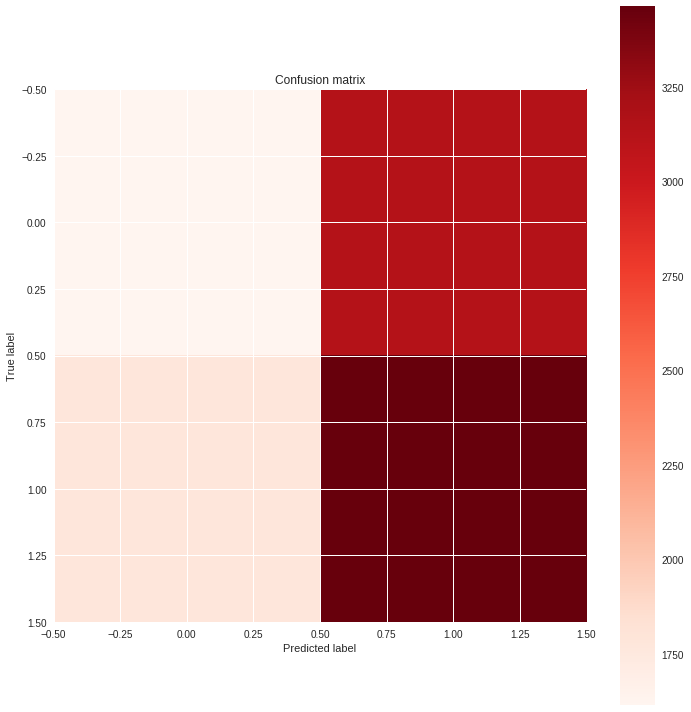

In [129]:
log_clf=LogisticRegression()
train_score(log_clf,X,y)

Training Data Accuracy: 0.99
Test Data Accuracy:     0.49


Precision:              0.47
Recall:                 0.57

Confusion Matrix:

[[2717 2034]
 [3021 2221]]


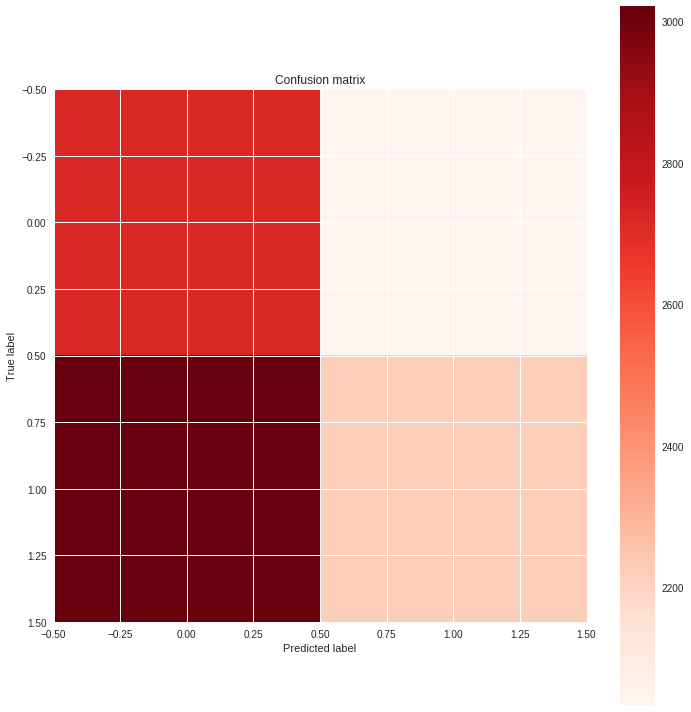

In [130]:
rfc_clf=RandomForestClassifier()
train_score(rfc_clf,X,y)

Training Data Accuracy: 0.53
Test Data Accuracy:     0.52


Precision:              0.49
Recall:                 0.04

Confusion Matrix:

[[ 211 4540]
 [ 219 5023]]


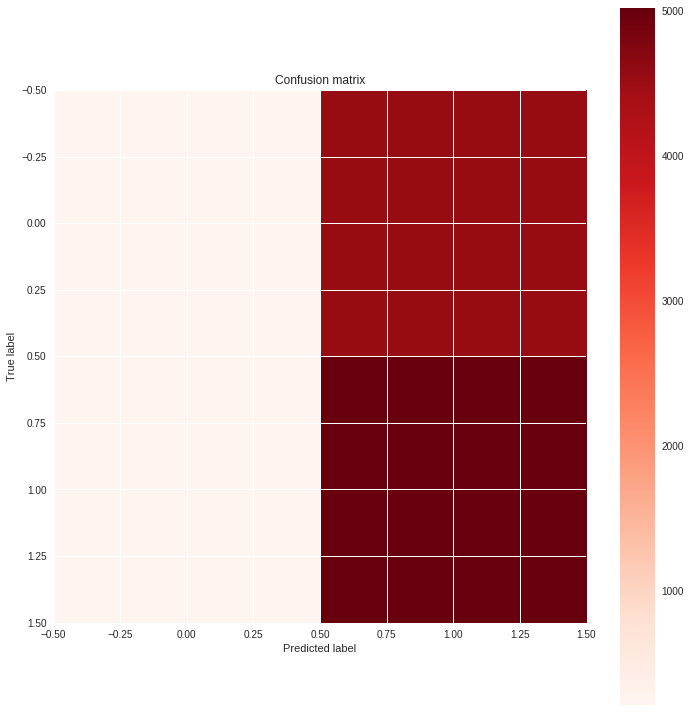

In [131]:
rfc_clf=RandomForestClassifier(max_depth=5)
train_score(rfc_clf,X,y)

In [118]:
max_depth_range = range(1,27,2)
param_grid = dict(max_depth=max_depth_range)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

In [120]:
grid.best_params_

{'max_depth': 1}

Training Data Accuracy: 0.52
Test Data Accuracy:     0.52


Precision:              nan
Recall:                 0.00

Confusion Matrix:

[[   0 4751]
 [   0 5242]]


/home/paul/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in long_scalars


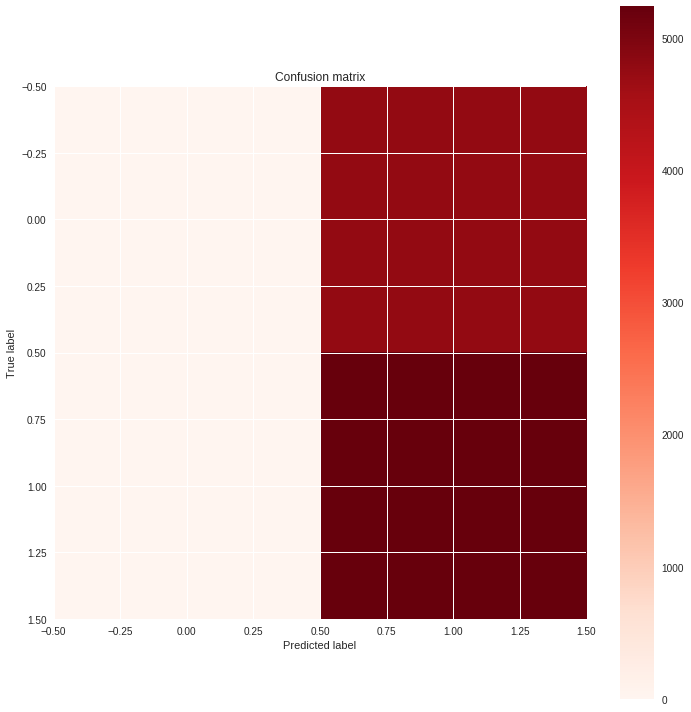

In [132]:
rfc_clf=RandomForestClassifier(max_depth=1)
train_score(rfc_clf,X,y)